# K Nearest Neighbour Model for User Authentication based on Keystroke Dynamics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load and explore data

In [8]:
data = pd.read_csv("Final_data50-50.csv")
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [9]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

# Data Visualization

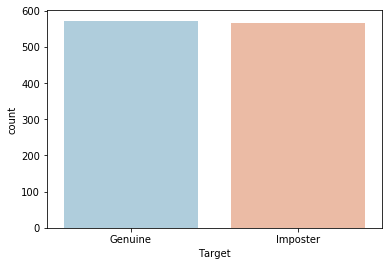

In [10]:
sns.countplot(x='Target',data=train,palette='RdBu_r')

# Split data into train and test data

In [12]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:32])
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

# Train model with training data.

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
y_test.count()

285

# Predict Results

[[145   5]
 [  3 132]]


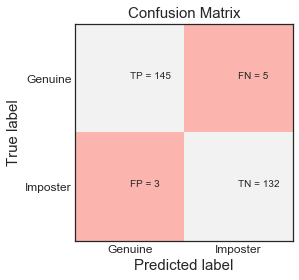

In [14]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [8]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.97      0.97      0.97       143
   Imposter       0.97      0.97      0.97       142

avg / total       0.97      0.97      0.97       285



In [9]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.968421052631579


In [10]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

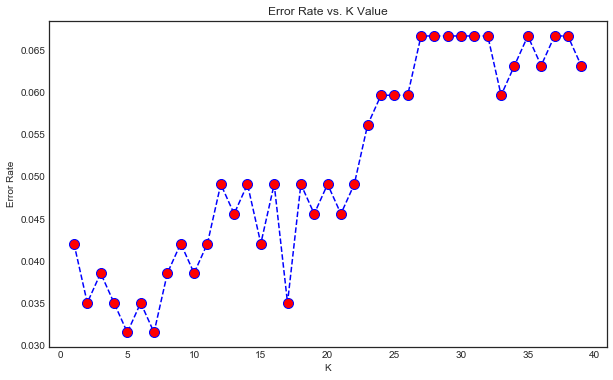

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:32])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
 <a list of 7 Text yticklabel objects>)

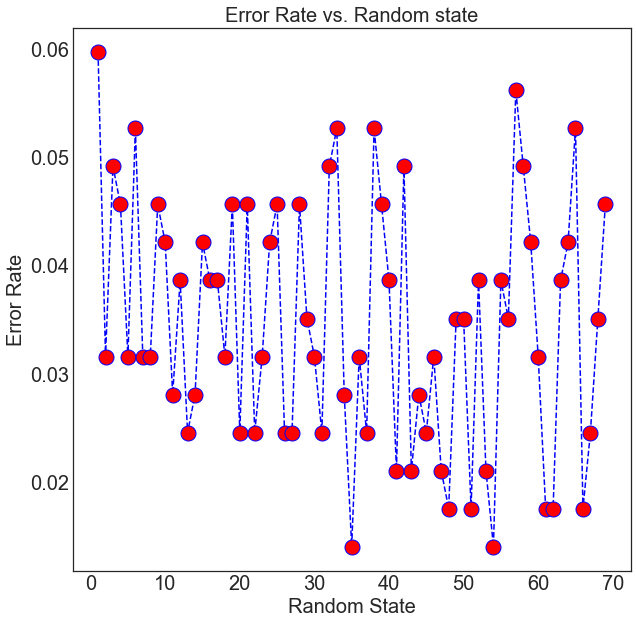

In [13]:
ax =plt.figure(figsize=(10,10))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15,)
plt.title('Error Rate vs. Random state',fontsize=20)
plt.xlabel('Random State',fontsize=20)
plt.ylabel('Error Rate',fontsize=20)
# plt.axis([1,70,0.1,])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [14]:
plt

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [15]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 33)
    features = list(data.columns[1:32])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0,0.5,'Accuracy')

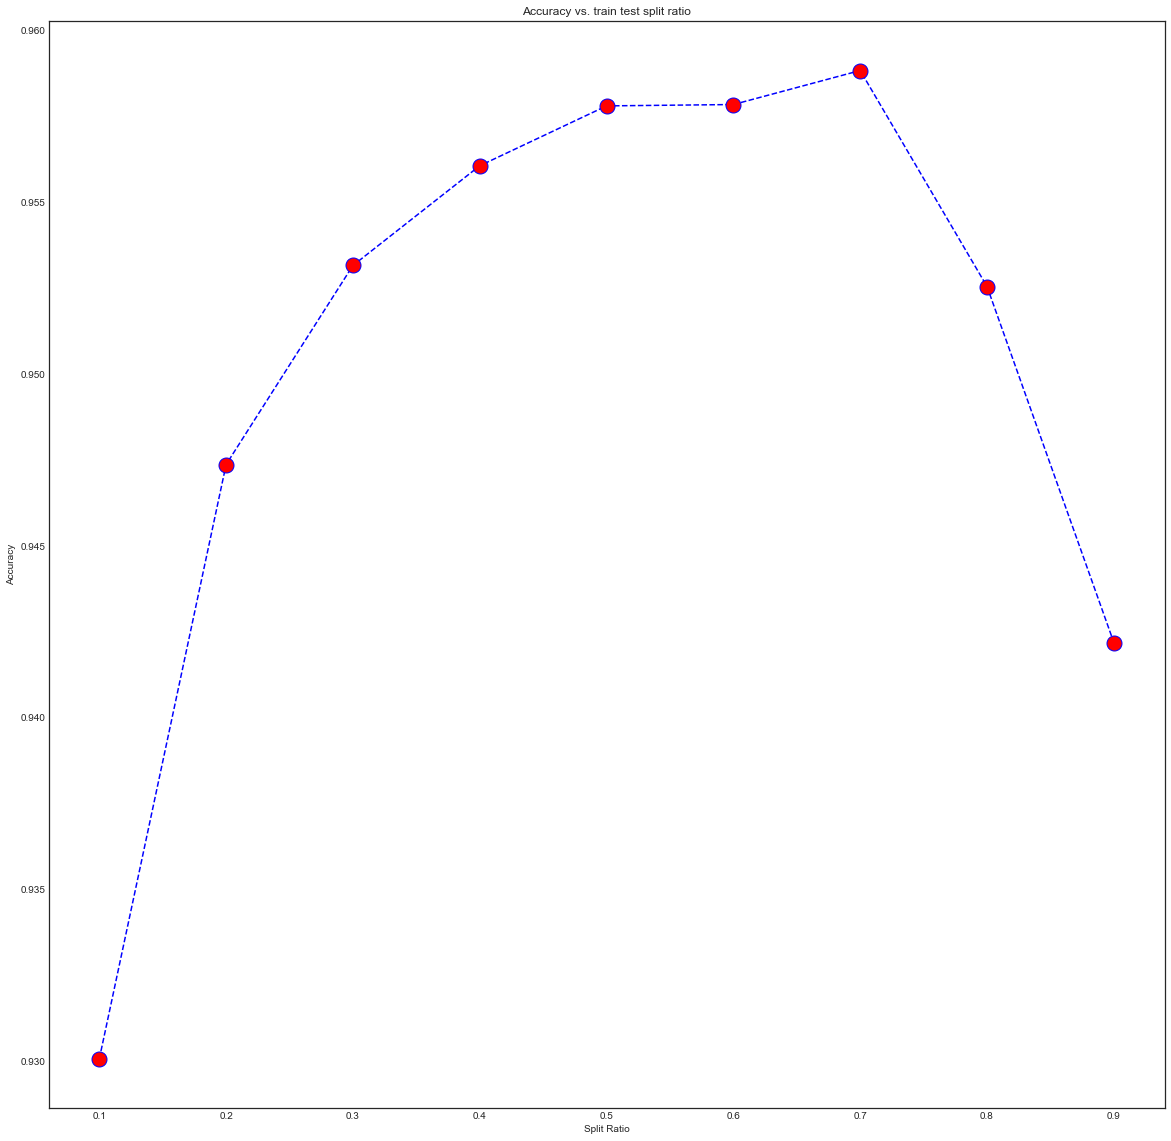

In [16]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

In [17]:
data = pd.read_csv("Final_data50-50.csv")
train, test = train_test_split(data, test_size = 0.2, random_state=33)
features = list(data.columns[1:32])


X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

[[135   7]
 [  8 135]]


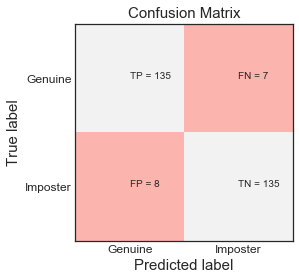

In [18]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [19]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

    Genuine       0.94      0.95      0.95       142
   Imposter       0.95      0.94      0.95       143

avg / total       0.95      0.95      0.95       285



In [20]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9473684210526315
